In [1]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

c:\Users\bunmi\anaconda3\envs\python_course\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [6]:
#Data Cleaning
df['job_posted_date']= pd.to_datetime(df['job_posted_date']) #Converting the job_posted_date column from object to datetime datatype

In [ ]:
#Data Cleaning
# this query used for converting the string to list in job_skill column

df['job_skills'] =df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

In [9]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## What are the skills most in demand for the top 3 most popular data roles?

In [10]:
# Filter for only the United States
df_US =df[df['job_country'] == 'United States'].copy()

In [11]:
# To create a  new row for each element of the list in the column job_skills
df_skills= df_US.explode('job_skills')

In [ ]:
# checking the job_title shorts and job_skills columns (first 5 records) of the new dataframe 
df_skills[['job_title_short','job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab


In [ ]:
# this query will group the dataset by job role, skills and get the skill count
df_skills_count=df_skills.groupby(['job_title_short','job_skills']).size().reset_index(name='skill_count')
df_job_title_count

In [ ]:

df_skills_count.sort_values(by='skill_count', ascending=False,inplace=True)

In [15]:
df_skills_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [16]:
df_skills_count['job_title_short'].unique().tolist()

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [ ]:
# Top 3  most in-demand roles
job_titles=df_skills_count['job_title_short'].unique().tolist()[0:3]

In [18]:
job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

In [ ]:
# sort Top 3  most in-demand roles alphabetically
job_titles=sorted(job_titles)

In [20]:
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

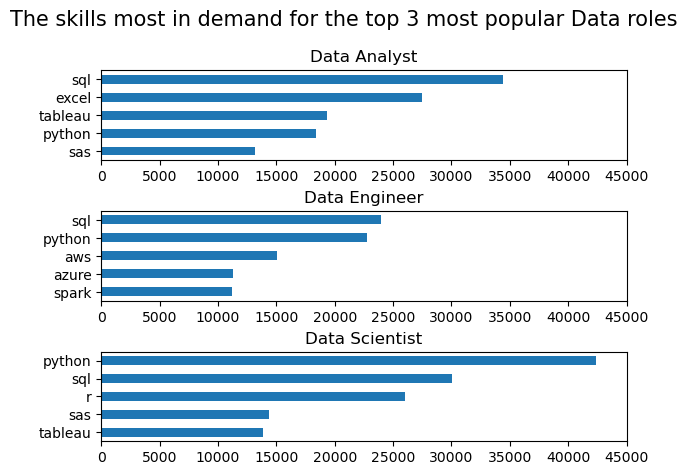

In [21]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot2 = df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
    df_plot2.plot(kind='barh',y='skill_count', x='job_skills',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,45000)
    ax[i].legend().set_visible(False)
fig.suptitle('The skills most in demand for the top 3 most popular Data roles', fontsize=15)
plt.tight_layout(h_pad=0.5)


In [22]:
#To get how many job posting we have for each data job role in the United States
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [23]:
skill_job_perc = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')

In [24]:
skill_job_perc['skill_percent']= 100*skill_job_perc['skill_count']/skill_job_perc['jobs_total']

In [25]:
skill_job_perc.head()

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534


In [26]:
df_plot2 = skill_job_perc[skill_job_perc['job_title_short']== job_title].head(5)
df_plot2

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
2,Data Scientist,sql,30034,58830,51.052184
4,Data Scientist,r,26022,58830,44.232534
10,Data Scientist,sas,14340,58830,24.375319
11,Data Scientist,tableau,13859,58830,23.557709


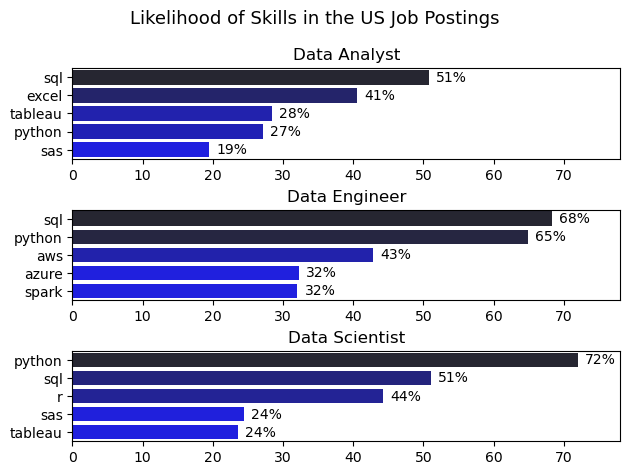

In [27]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot2 = skill_job_perc[skill_job_perc['job_title_short']== job_title].head(5)
    #df_plot2.plot(kind='barh',y='skill_percent', x='job_skills',ax=ax[i],title=job_title)
    sns.barplot(data=df_plot2,y='job_skills',x='skill_percent',ax=ax[i],hue='skill_count',palette='dark:b_r')
    #ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    for n, v in enumerate(df_plot2['skill_percent']):
        ax[i].text(v +1 ,n, f'{v:.0f}%',va='center')
fig.suptitle('Likelihood of Skills in the US Job Postings', fontsize=13)
plt.tight_layout(h_pad=0.5)